<a href="https://colab.research.google.com/github/asgarali429/Machine-learning/blob/main/Feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Feature Transformation

1.StandardScalar

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df=df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
316,54,104000,1
307,47,113000,1
125,39,61000,0
185,31,66000,0
327,42,75000,0


In [5]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.iloc[:,:2],df.iloc[:,-1],test_size=0.3,random_state=42)

xtrain.shape,xtest.shape

((280, 2), (120, 2))

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [8]:
import matplotlib.pyplot as plt

In [9]:
xtrain_scaled = pd.DataFrame(xtrain_scaled, columns=xtrain.columns)
xtest_scaled = pd.DataFrame(xtest_scaled, columns=xtest.columns)

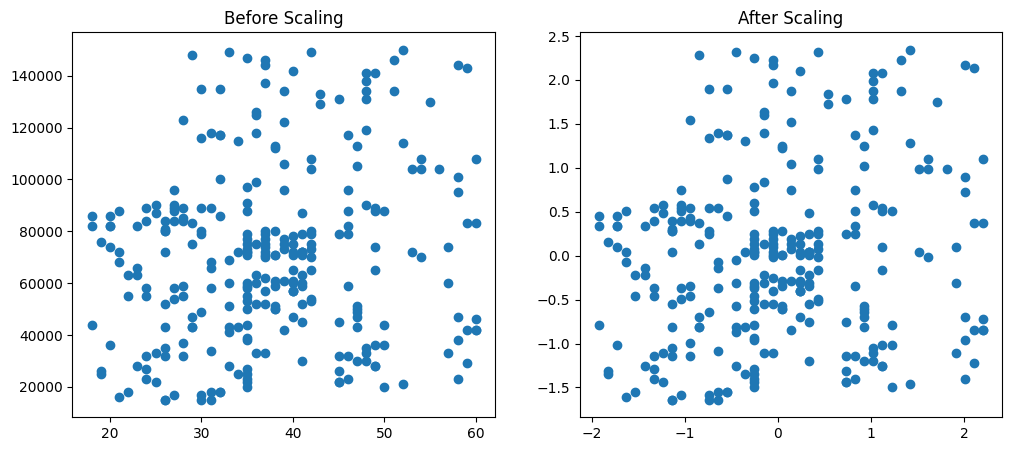

In [10]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(xtrain['Age'],xtrain['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(xtrain_scaled['Age'],xtrain_scaled['EstimatedSalary'])
ax2.set_title('After Scaling')
plt.show()

Why we perform a scaling ?

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
scaled_model = LogisticRegression()

model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

scaled_model.fit(xtrain_scaled , ytrain)
ypred_scaled = scaled_model.predict(xtest_scaled)

from sklearn.metrics import accuracy_score

print("Actual",accuracy_score(ytest,ypred))
print("Scaled",accuracy_score(ytest,ypred_scaled))

Actual 0.6083333333333333
Scaled 0.85


we perform a scaling in order to improve a model accuracy , and we see above that Age and Estimatedsalary both are numerical feature but when we find Euclidean distance between them than it is huge number . After performing a standardScaler the values transform and the mean is 0 and standard deviation is 1 .so the Euclidean distance is not a huge number.It take less time as compared to actual feature and increase the model accuracy



2.MinMax Scaling

In [15]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [18]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

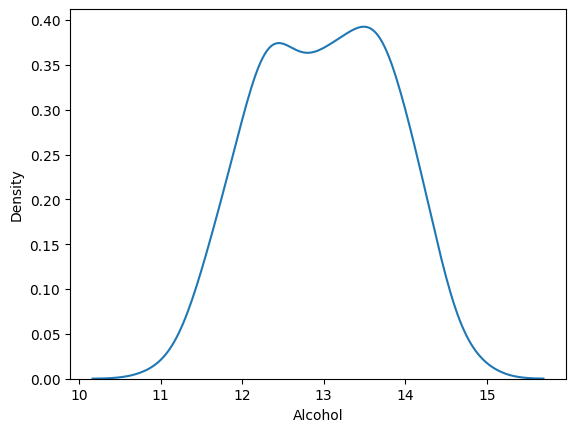

In [24]:
import seaborn as sns

sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

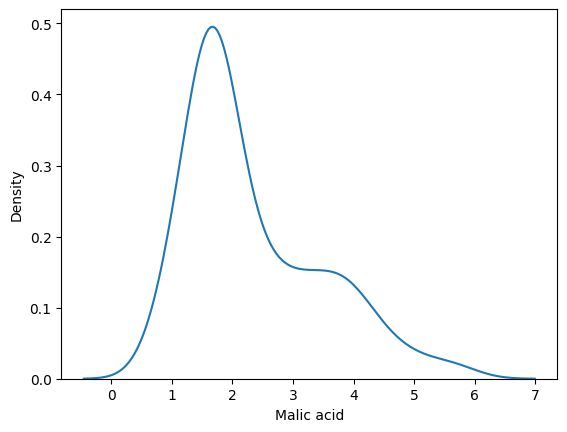

In [25]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

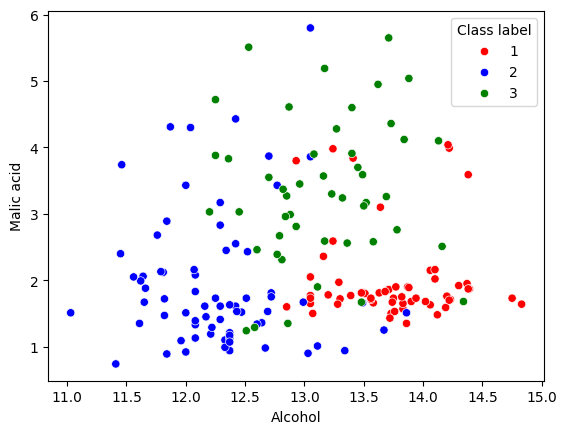

In [29]:
color_dict={1:'red',3:'green',2:'blue'}

sns.scatterplot(df,x='Alcohol',y='Malic acid',hue=df['Class label'],palette=color_dict)

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.iloc[:,1:3],df.iloc[:,-1],test_size=0.3,random_state = 42)
xtrain.shape,xtest.shape

((124, 2), (54, 2))

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [34]:
xtrain_scaled = pd.DataFrame(xtrain_scaled,columns=xtrain.columns)
xtest_scaled = pd.DataFrame(xtest_scaled,columns = xtest.columns)

In [36]:
import numpy as np
np.round(xtrain.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.3,1.6
50%,12.9,1.9
75%,13.7,3.2
max,14.8,5.8


In [39]:
np.round(xtrain_scaled.describe(), 1) ## Note min value is 0 and max value is 1

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


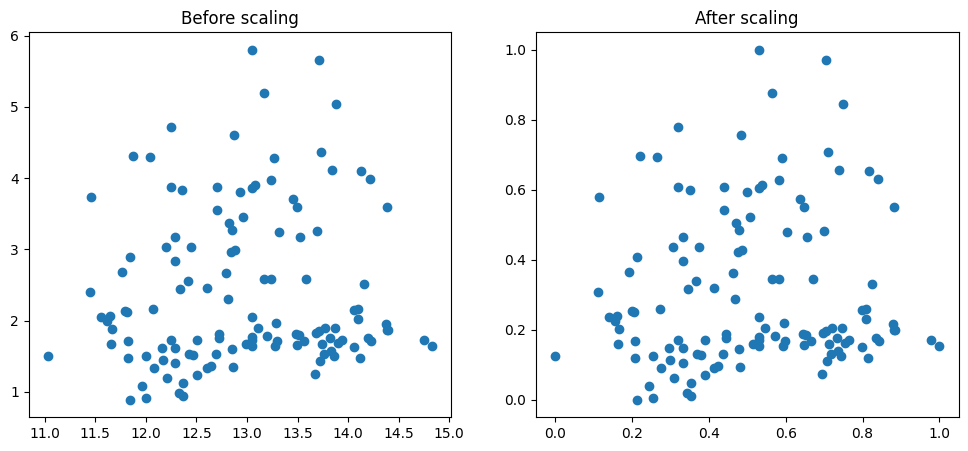

In [44]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(xtrain['Alcohol'],xtrain['Malic acid'])
ax1.set_title('Before scaling')
ax2.scatter(xtrain_scaled['Alcohol'],xtrain_scaled['Malic acid'])
ax2.set_title('After scaling')
plt.show()

 MinMax scaling is a useful preprocessing technique in many machine learning scenarios, especially for neural networks, distance-based algorithms, and applications where preserving the original range of the data is important(Example CNN).